Assignment task: Find the best neural network model for the bus delay prediction(assignment submission)

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df = pd.read_csv("Exercise7data.csv")
# Do not Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)
# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)
# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']
# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

activation='relu'，32 units，64 units

In [3]:
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [6]:
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)


Epoch 1: val_mae improved from inf to 30.09757, saving model to weights.best.h5


D:\Python\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 30.09757 to 27.39850, saving model to weights.best.h5

Epoch 3: val_mae improved from 27.39850 to 26.18517, saving model to weights.best.h5

Epoch 4: val_mae improved from 26.18517 to 25.91142, saving model to weights.best.h5

Epoch 5: val_mae did not improve from 25.91142

Epoch 6: val_mae improved from 25.91142 to 25.72442, saving model to weights.best.h5

Epoch 7: val_mae did not improve from 25.72442

Epoch 8: val_mae did not improve from 25.72442

Epoch 9: val_mae did not improve from 25.72442

Epoch 10: val_mae did not improve from 25.72442

Epoch 11: val_mae did not improve from 25.72442


32/32 [==============================] - 0s 1ms/step
Mean Absolute Error: 28.16863262383239
Mean Squared Error: 1343.1363167108184
R-squared: 0.9118723065427561


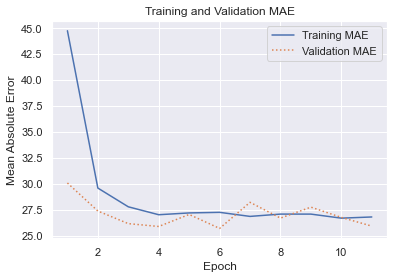

In [12]:
# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

activation='relu'，16 units，16 units

32/32 [==============================] - 0s 830us/step
Mean Absolute Error: 81.92179976057069
Mean Squared Error: 17892.537456292917
R-squared: -0.1739895917503751


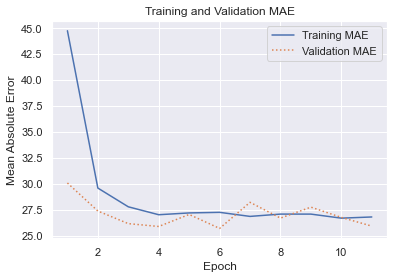

In [13]:
model = Sequential()
# Add a Dense layer with 16 units, ReLU activation, and an input dimension of 4.
model.add(Dense(16, activation='relu', input_dim=4))
# Add another Dense layer with 16 units and ReLU activation.
model.add(Dense(16, activation='relu'))
# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
activation='relu'，32 units，32 units


Epoch 1: val_mae improved from inf to 28.03675, saving model to weights.best.h5

Epoch 2: val_mae improved from 28.03675 to 26.11266, saving model to weights.best.h5


D:\Python\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae did not improve from 26.11266

Epoch 4: val_mae did not improve from 26.11266

Epoch 5: val_mae improved from 26.11266 to 25.45221, saving model to weights.best.h5

Epoch 6: val_mae improved from 25.45221 to 25.26280, saving model to weights.best.h5

Epoch 7: val_mae did not improve from 25.26280

Epoch 8: val_mae did not improve from 25.26280

Epoch 9: val_mae did not improve from 25.26280

Epoch 10: val_mae did not improve from 25.26280

Epoch 11: val_mae did not improve from 25.26280
32/32 [==============================] - 0s 728us/step
Mean Absolute Error: 28.007893798619598
Mean Squared Error: 1380.8400855232164
R-squared: 0.9093984353959921


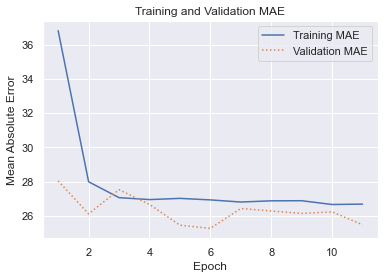

In [14]:
#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))
# Add another Dense layer with 32 units and ReLU activation.
model.add(Dense(32, activation='relu'))
# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])


#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

activation='relu'，16 units，32 units


Epoch 1: val_mae improved from inf to 32.59362, saving model to weights.best.h5


D:\Python\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 32.59362 to 28.02124, saving model to weights.best.h5

Epoch 3: val_mae improved from 28.02124 to 27.25343, saving model to weights.best.h5

Epoch 4: val_mae improved from 27.25343 to 26.33961, saving model to weights.best.h5

Epoch 5: val_mae improved from 26.33961 to 25.93448, saving model to weights.best.h5

Epoch 6: val_mae did not improve from 25.93448

Epoch 7: val_mae did not improve from 25.93448

Epoch 8: val_mae did not improve from 25.93448

Epoch 9: val_mae improved from 25.93448 to 25.87872, saving model to weights.best.h5

Epoch 10: val_mae did not improve from 25.87872

Epoch 11: val_mae improved from 25.87872 to 25.64237, saving model to weights.best.h5

Epoch 12: val_mae improved from 25.64237 to 25.63885, saving model to weights.best.h5

Epoch 13: val_mae did not improve from 25.63885

Epoch 14: val_mae did not improve from 25.63885

Epoch 15: val_mae did not improve from 25.63885

Epoch 16: val_mae improved from 25.63885 to 25.56628, s

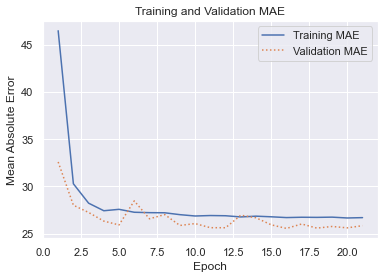

In [15]:
#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 16 units, ReLU activation, and an input dimension of 4.
model.add(Dense(16, activation='relu', input_dim=4))

# Add another Dense layer with 32 units and ReLU activation.
model.add(Dense(32, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])


#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

activation='sigmoid'，32 units，64 units


Epoch 1: val_mae improved from inf to 87.00500, saving model to weights.best.h5

Epoch 2: val_mae improved from 87.00500 to 84.59229, saving model to weights.best.h5


D:\Python\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 84.59229 to 81.95833, saving model to weights.best.h5

Epoch 4: val_mae improved from 81.95833 to 79.02713, saving model to weights.best.h5

Epoch 5: val_mae improved from 79.02713 to 76.57105, saving model to weights.best.h5

Epoch 6: val_mae improved from 76.57105 to 74.06798, saving model to weights.best.h5

Epoch 7: val_mae improved from 74.06798 to 72.14668, saving model to weights.best.h5

Epoch 8: val_mae improved from 72.14668 to 70.35001, saving model to weights.best.h5

Epoch 9: val_mae improved from 70.35001 to 68.86768, saving model to weights.best.h5

Epoch 10: val_mae improved from 68.86768 to 67.62598, saving model to weights.best.h5

Epoch 11: val_mae improved from 67.62598 to 66.66278, saving model to weights.best.h5

Epoch 12: val_mae improved from 66.66278 to 65.81413, saving model to weights.best.h5

Epoch 13: val_mae improved from 65.81413 to 64.82552, saving model to weights.best.h5

Epoch 14: val_mae improved from 64.82552 to 63.87

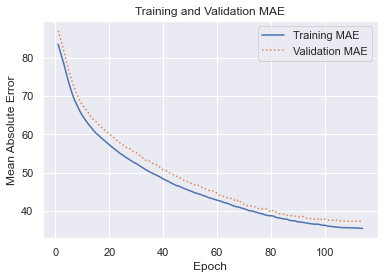

In [16]:
#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='sigmoid', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='sigmoid'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])


#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

activation='sigmoid'，32 units，32 units


Epoch 1: val_mae improved from inf to 88.64024, saving model to weights.best.h5

Epoch 2: val_mae improved from 88.64024 to 87.50300, saving model to weights.best.h5


D:\Python\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 87.50300 to 86.57266, saving model to weights.best.h5

Epoch 4: val_mae improved from 86.57266 to 85.26376, saving model to weights.best.h5

Epoch 5: val_mae improved from 85.26376 to 83.61151, saving model to weights.best.h5

Epoch 6: val_mae improved from 83.61151 to 81.85933, saving model to weights.best.h5

Epoch 7: val_mae improved from 81.85933 to 80.34702, saving model to weights.best.h5

Epoch 8: val_mae improved from 80.34702 to 78.91369, saving model to weights.best.h5

Epoch 9: val_mae improved from 78.91369 to 77.53304, saving model to weights.best.h5

Epoch 10: val_mae improved from 77.53304 to 76.48614, saving model to weights.best.h5

Epoch 11: val_mae improved from 76.48614 to 75.42374, saving model to weights.best.h5

Epoch 12: val_mae improved from 75.42374 to 74.37209, saving model to weights.best.h5

Epoch 13: val_mae improved from 74.37209 to 73.51046, saving model to weights.best.h5

Epoch 14: val_mae improved from 73.51046 to 72.54

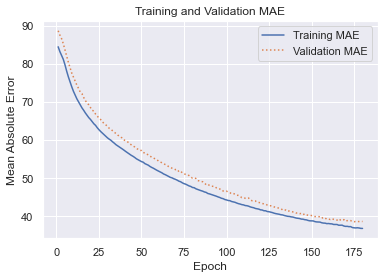

In [19]:
#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='sigmoid', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(32, activation='sigmoid'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])


#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
activation='sigmoid'，16 units，32 units


Epoch 1: val_mae improved from inf to 88.20320, saving model to weights.best.h5

Epoch 2: val_mae improved from 88.20320 to 86.79246, saving model to weights.best.h5


D:\Python\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 86.79246 to 85.57550, saving model to weights.best.h5

Epoch 4: val_mae improved from 85.57550 to 84.36525, saving model to weights.best.h5

Epoch 5: val_mae improved from 84.36525 to 83.06355, saving model to weights.best.h5

Epoch 6: val_mae improved from 83.06355 to 81.53156, saving model to weights.best.h5

Epoch 7: val_mae improved from 81.53156 to 79.99483, saving model to weights.best.h5

Epoch 8: val_mae improved from 79.99483 to 78.43841, saving model to weights.best.h5

Epoch 9: val_mae improved from 78.43841 to 77.00713, saving model to weights.best.h5

Epoch 10: val_mae improved from 77.00713 to 75.82970, saving model to weights.best.h5

Epoch 11: val_mae improved from 75.82970 to 74.65605, saving model to weights.best.h5

Epoch 12: val_mae improved from 74.65605 to 73.52408, saving model to weights.best.h5

Epoch 13: val_mae improved from 73.52408 to 72.53807, saving model to weights.best.h5

Epoch 14: val_mae improved from 72.53807 to 71.61

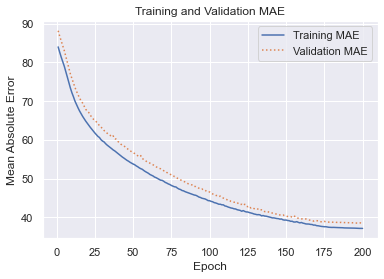

In [18]:
#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(16, activation='sigmoid', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(32, activation='sigmoid'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])


#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

activation='tanh'，32 units，64 units


Epoch 1: val_mae improved from inf to 83.08263, saving model to weights.best.h5

Epoch 2: val_mae improved from 83.08263 to 77.80427, saving model to weights.best.h5


D:\Python\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 77.80427 to 74.14216, saving model to weights.best.h5

Epoch 4: val_mae improved from 74.14216 to 71.36491, saving model to weights.best.h5

Epoch 5: val_mae improved from 71.36491 to 69.04885, saving model to weights.best.h5

Epoch 6: val_mae improved from 69.04885 to 67.34912, saving model to weights.best.h5

Epoch 7: val_mae improved from 67.34912 to 65.78617, saving model to weights.best.h5

Epoch 8: val_mae improved from 65.78617 to 64.99211, saving model to weights.best.h5

Epoch 9: val_mae improved from 64.99211 to 63.56177, saving model to weights.best.h5

Epoch 10: val_mae improved from 63.56177 to 62.37106, saving model to weights.best.h5

Epoch 11: val_mae improved from 62.37106 to 61.56247, saving model to weights.best.h5

Epoch 12: val_mae improved from 61.56247 to 60.84678, saving model to weights.best.h5

Epoch 13: val_mae improved from 60.84678 to 59.97996, saving model to weights.best.h5

Epoch 14: val_mae improved from 59.97996 to 59.29

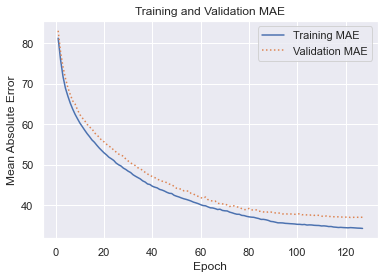

In [20]:
#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='tanh', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='tanh'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])


#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

activation='tanh'，32 units，32 units


Epoch 1: val_mae improved from inf to 87.83295, saving model to weights.best.h5

Epoch 2: val_mae improved from 87.83295 to 86.86848, saving model to weights.best.h5


D:\Python\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 86.86848 to 85.97934, saving model to weights.best.h5

Epoch 4: val_mae improved from 85.97934 to 84.67419, saving model to weights.best.h5

Epoch 5: val_mae improved from 84.67419 to 83.13807, saving model to weights.best.h5

Epoch 6: val_mae improved from 83.13807 to 81.65083, saving model to weights.best.h5

Epoch 7: val_mae improved from 81.65083 to 80.30383, saving model to weights.best.h5

Epoch 8: val_mae improved from 80.30383 to 79.15660, saving model to weights.best.h5

Epoch 9: val_mae improved from 79.15660 to 78.06217, saving model to weights.best.h5

Epoch 10: val_mae improved from 78.06217 to 77.05618, saving model to weights.best.h5

Epoch 11: val_mae improved from 77.05618 to 76.16029, saving model to weights.best.h5

Epoch 12: val_mae improved from 76.16029 to 75.29398, saving model to weights.best.h5

Epoch 13: val_mae improved from 75.29398 to 74.51421, saving model to weights.best.h5

Epoch 14: val_mae improved from 74.51421 to 73.87

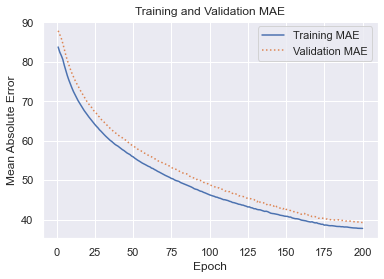

In [21]:
#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='sigmoid', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(32, activation='sigmoid'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])


#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

activation='tanh'，16 units，32 units


Epoch 1: val_mae improved from inf to 88.18834, saving model to weights.best.h5

Epoch 2: val_mae improved from 88.18834 to 86.85767, saving model to weights.best.h5


D:\Python\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 86.85767 to 85.74609, saving model to weights.best.h5

Epoch 4: val_mae improved from 85.74609 to 84.58740, saving model to weights.best.h5

Epoch 5: val_mae improved from 84.58740 to 83.32066, saving model to weights.best.h5

Epoch 6: val_mae improved from 83.32066 to 82.02816, saving model to weights.best.h5

Epoch 7: val_mae improved from 82.02816 to 80.77807, saving model to weights.best.h5

Epoch 8: val_mae improved from 80.77807 to 79.47336, saving model to weights.best.h5

Epoch 9: val_mae improved from 79.47336 to 78.27168, saving model to weights.best.h5

Epoch 10: val_mae improved from 78.27168 to 77.25746, saving model to weights.best.h5

Epoch 11: val_mae improved from 77.25746 to 76.16873, saving model to weights.best.h5

Epoch 12: val_mae improved from 76.16873 to 75.15652, saving model to weights.best.h5

Epoch 13: val_mae improved from 75.15652 to 74.45989, saving model to weights.best.h5

Epoch 14: val_mae improved from 74.45989 to 73.71

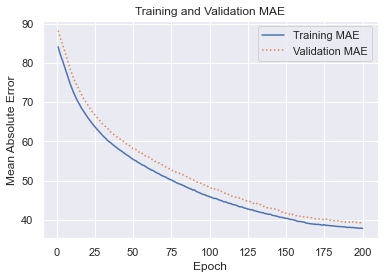

In [22]:
#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(16, activation='sigmoid', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(32, activation='sigmoid'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])


#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
import itertools

# Define a list of possible dense layer sizes
dense_layer_sizes = [16, 32, 64]

# Define a list of possible activation functions
activation_functions = ['linear', 'sigmoid', 'tanh', 'relu']

# Initialize variables to store the best configuration and performance
best_config = None
best_mae = float('inf')

# Initialize a list to store results
results = []

# Iterate through all combinations of dense layer sizes and activation functions
for dense_size, activation_func in itertools.product(dense_layer_sizes, activation_functions):

    model = Sequential()
    model.add(Dense(dense_size, activation=activation_func, input_dim=4))
    model.add(Dense(dense_size, activation=activation_func))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])
    model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=5, verbose=0)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    # Check if this configuration has the lowest MAE so far
    if mae < best_mae:
        best_mae = mae
        best_config = (dense_size, activation_func)
    # Store the results in the list
    results.append({'Dense Size': dense_size, 'Activation': activation_func, 'MAE': mae, 'MSE': mse, 'R2': r2})
print(f"Best configuration: Dense size={best_config[0]}, Activation={best_config[1]}")
print(f"Best MAE: {best_mae}")



32/32 [==============================] - 0s 784us/step
Best configuration: Dense size=16, Activation=linear
Best MAE: 27.896322985790288


In [28]:
# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by MSE and MAE in ascending order
mse_sorted_df = results_df.sort_values(by='MSE', ascending=True)
mae_sorted_df = results_df.sort_values(by='MAE', ascending=True)

# Sort the DataFrame by R2 in descending order
r2_sorted_df = results_df.sort_values(by='R2', ascending=False)

# Display the sorted DataFrames
print("Sorted by MSE:")
print(mse_sorted_df)
print("="*50)

print("Sorted by MAE:")
print(mae_sorted_df)
print("="*50)

print("Sorted by R2:")
print(r2_sorted_df)

Sorted by MSE:
    Dense Size Activation        MAE          MSE        R2
0           16     linear  27.896323  5462.175375  0.641608
1           16    sigmoid  69.219786  5462.175375  0.641608
2           16       tanh  64.877862  5462.175375  0.641608
3           16       relu  28.632713  5462.175375  0.641608
4           32     linear  28.034440  5462.175375  0.641608
5           32    sigmoid  64.478226  5462.175375  0.641608
6           32       tanh  57.225712  5462.175375  0.641608
7           32       relu  31.494873  5462.175375  0.641608
8           64     linear  29.140556  5462.175375  0.641608
9           64    sigmoid  55.401783  5462.175375  0.641608
10          64       tanh  50.189917  5462.175375  0.641608
11          64       relu  30.397706  5462.175375  0.641608
Sorted by MAE:
    Dense Size Activation        MAE          MSE        R2
0           16     linear  27.896323  5462.175375  0.641608
4           32     linear  28.034440  5462.175375  0.641608
3         

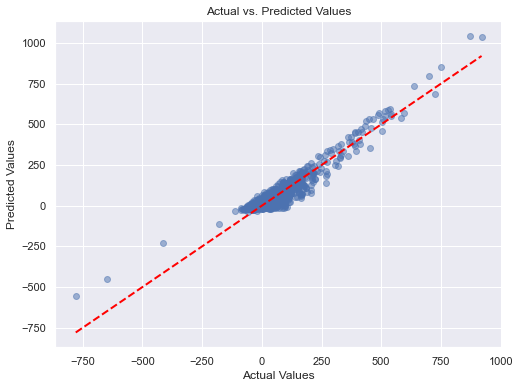

In [29]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

For the best model,


Epoch 1: val_mae improved from inf to 34.17870, saving model to weights.best.h5


D:\Python\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 34.17870 to 27.44842, saving model to weights.best.h5

Epoch 3: val_mae improved from 27.44842 to 26.87334, saving model to weights.best.h5

Epoch 4: val_mae improved from 26.87334 to 25.45163, saving model to weights.best.h5

Epoch 5: val_mae did not improve from 25.45163

Epoch 6: val_mae did not improve from 25.45163

Epoch 7: val_mae did not improve from 25.45163

Epoch 8: val_mae did not improve from 25.45163

Epoch 9: val_mae improved from 25.45163 to 25.37821, saving model to weights.best.h5

Epoch 10: val_mae did not improve from 25.37821

Epoch 11: val_mae did not improve from 25.37821

Epoch 12: val_mae did not improve from 25.37821

Epoch 13: val_mae did not improve from 25.37821

Epoch 14: val_mae improved from 25.37821 to 25.35193, saving model to weights.best.h5

Epoch 15: val_mae did not improve from 25.35193

Epoch 16: val_mae did not improve from 25.35193

Epoch 17: val_mae did not improve from 25.35193

Epoch 18: val_mae did not improve

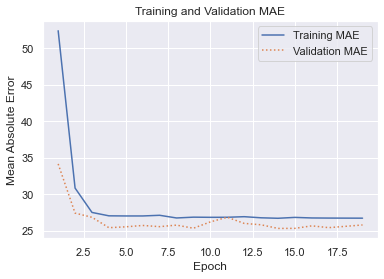

In [32]:
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

model.add(Dense(16, activation='linear', input_dim=4))

# Add another Dense layer with 32 units and Linear activation.
model.add(Dense(16, activation='linear'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])


#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")